# Введение

Нам предоставлен Датасет с продажами консольных и ПК игр за большой промежуток времени. задача изучить и дать рекомендации

## Знакомимся с данными

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st


In [2]:
#df = pd.read_csv('D:\Карманов\личное\Практикум\проект 5 сборный\games.csv')
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.columns = df.columns.str.lower()
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Смело этим жертвуем. Пара игр на Мегадрайве, у одной и продаж то нет. какая-нибудь японская дичь видимо была)

In [6]:
df = df.dropna(subset=['name'])

In [7]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [8]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [9]:
df[df['platform']=='GEN']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
145,Sonic the Hedgehog 2,GEN,1992.0,Platform,4.47,1.20,0.16,0.19,NaN,NaN,NaN
257,Sonic the Hedgehog,GEN,1991.0,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
564,Mortal Kombat,GEN,1992.0,Fighting,1.95,0.63,0.00,0.09,NaN,NaN,NaN
588,Streets of Rage,GEN,1990.0,Action,1.86,0.55,0.11,0.08,NaN,NaN,NaN
832,NBA Jam,GEN,1992.0,Sports,1.75,0.25,0.00,0.05,NaN,NaN,NaN
960,Sonic & Knuckles,GEN,1994.0,Platform,1.24,0.43,0.03,0.12,NaN,NaN,NaN
996,Sonic the Hedgehog 3,GEN,1994.0,Platform,1.02,0.47,0.20,0.07,NaN,NaN,NaN
1099,Street Fighter II': Special Champion Edition,GEN,1992.0,Fighting,1.00,0.30,0.31,0.04,NaN,NaN,NaN
1365,Disney's The Lion King,GEN,1994.0,Platform,0.97,0.37,0.03,0.05,NaN,NaN,NaN
1453,Mortal Kombat 3,GEN,1994.0,Fighting,1.03,0.27,0.00,0.04,NaN,NaN,NaN


Смущает меня эта выборка: 

Соник 2 в Америке 4,5 млн , 1,2 в европе и всего 160 тычсяч у себя на родине?

Beyond Oasis - по нулям в Европе и Америке, но при этом есть продажи в Японии??? это же европейское название игры. в японии она называлась The story of Thor! и вышла она в японии в 94-м, а в европе и америке в 95-м, но никак не в 93-м

In [10]:
df[df['name'].str.contains('Sonic Adventure')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
601,Sonic Adventure 2 Battle,GC,2001.0,Platform,1.70,0.59,0.21,0.07,73.0,8.3,E
643,Sonic Adventure,DC,1998.0,Platform,1.26,0.61,0.46,0.08,NaN,NaN,NaN
1565,Sonic Adventure DX: Director's Cut,GC,2003.0,Platform,0.87,0.30,0.06,0.03,57.0,7.9,E
9844,Sonic Adventure 2,DC,2001.0,Platform,0.00,0.00,0.12,0.00,89.0,8.6,E


второй Адвенчур ни в Европе ни в Америке на Дримкасте не продался?..
<a href="https://ru.wikibrief.org/wiki/Sonic_Adventure_2#:~:text=Sonic%20Adventure%202%20Battle%20%D1%82%D0%B0%D0%BA%D0%B6%D0%B5,%D0%B4%D0%BB%D1%8F%20%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D0%B9%20Dreamcast%20%D0%B8%20GameCube">Ссылка</a>.
судя по этому сайту итого продаж примерно то-же количество, но вот распределение не то

и где версия для ПК и для ящика 360?

In [11]:
df[(df['rating'].isna())&(~df['year_of_release'].isna())].sort_values('year_of_release').tail(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15814,Koihime Enbu,PS4,2016.0,Fighting,0.00,0.00,0.02,0.00,NaN,NaN,NaN
8022,Jikkyou Powerful Pro Baseball 2016,PSV,2016.0,Sports,0.00,0.00,0.18,0.00,NaN,NaN,NaN
15790,This War of Mine,PS4,2016.0,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN
15782,Taishou Moebius Line Vitable,PSV,2016.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
8282,Jikkyou Powerful Pro Baseball 2016,PS4,2016.0,Sports,0.00,0.00,0.17,0.00,NaN,NaN,NaN
15748,Revolution: 25th Anniversary Collection,PC,2016.0,Adventure,0.00,0.02,0.00,0.00,NaN,tbd,NaN
8611,Yakuza Kiwami,PS4,2016.0,Adventure,0.00,0.00,0.16,0.00,NaN,NaN,NaN
7769,Kan Colle Kai,PSV,2016.0,Action,0.00,0.00,0.19,0.00,NaN,NaN,NaN
15678,"Moshi, Kono Sekai ni Kami-sama ga Iru to suru ...",PSV,2016.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
15627,Uppers,PSV,2016.0,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN


In [12]:
df[df['name'].str.contains('Resident Evil')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
151,Resident Evil 2,PS,1998.0,Action,1.88,1.47,2.02,0.45,89.0,9.2,M
199,Resident Evil 5,PS3,2009.0,Action,1.96,1.41,1.08,0.64,84.0,7.5,M
203,Resident Evil,PS,1996.0,Action,2.05,1.16,1.11,0.73,91.0,9,M
327,Resident Evil Director's Cut,PS,1996.0,Action,1.82,1.24,0.47,0.25,NaN,NaN,NaN
334,Resident Evil 3: Nemesis,PS,1999.0,Action,1.30,0.77,1.54,0.11,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14871,Resident Evil 5 HD,PS4,2016.0,Action,0.02,0.00,0.00,0.01,NaN,NaN,NaN
15148,Resident Evil: Umbrella Corps,PS4,2016.0,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN
15371,Resident Evil Zero,PC,2016.0,Action,0.01,0.01,0.00,0.00,NaN,NaN,NaN
15467,Resident Evil 4 HD,XOne,2016.0,Shooter,0.02,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
df[(df['name'].str.contains('Resident Evil'))&(df['year_of_release']!=2016)].sort_values('year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
203,Resident Evil,PS,1996.0,Action,2.05,1.16,1.11,0.73,91.0,9,M
327,Resident Evil Director's Cut,PS,1996.0,Action,1.82,1.24,0.47,0.25,NaN,NaN,NaN
8448,Resident Evil,SAT,1997.0,Action,0.00,0.00,0.17,0.00,NaN,NaN,NaN
8287,Resident Evil Director's Cut: Dual Shock Edition,PS,1997.0,Action,0.00,0.00,0.16,0.01,NaN,NaN,NaN
151,Resident Evil 2,PS,1998.0,Action,1.88,1.47,2.02,0.45,89.0,9.2,M
6258,Resident Evil 2: Dual Shock Edition,PS,1998.0,Action,0.00,0.00,0.26,0.02,NaN,NaN,NaN
3585,Resident Evil 2,N64,1999.0,Action,0.39,0.09,0.07,0.01,NaN,NaN,NaN
334,Resident Evil 3: Nemesis,PS,1999.0,Action,1.30,0.77,1.54,0.11,NaN,NaN,NaN
2869,Resident Evil: Survivor,PS,2000.0,Action,0.23,0.15,0.29,0.05,39.0,7,M
1787,Resident Evil - Code: Veronica,DC,2000.0,Action,0.41,0.23,0.47,0.03,NaN,NaN,NaN


In [14]:
df[(df['name'].str.contains('biohazard', case=False))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
8172,Biohazard: Revival Selection,PS3,2011.0,Action,0.00,0.0,0.18,0.0,NaN,NaN,NaN
14766,Biohazard: Revival Selection,X360,2011.0,Action,0.00,0.0,0.03,0.0,NaN,NaN,NaN
15734,Prototype: Biohazard Bundle,PS4,2016.0,Action,0.01,0.0,0.00,0.0,48.0,2,M
16314,Prototype: Biohazard Bundle,XOne,2016.0,Action,0.01,0.0,0.00,0.0,56.0,3.1,M


вопросов к Рейтингу все больше. 

1) понятно, что ESRB - Американская рейтинговая компания, и релизы для Европы (PEGI) тут не отмечены, а уж японии так тем более. Но если Японскую дичь можно вычислить по названию, то как определить, что релиз Европейский?

2) понятно, что игры до формирования ESRB не могут обладать этим рейтингом. это логично.

3) допустим игры 2016 года еще рейтинг не получили (хотя при этом успели продаться)

4) но вот почему несколько Резидентов в 2000-х не обладают рейтингом? хоть и по продажам это похоже на японский рынок, но там серия игр называется BioHazard вроде, а их в этом датасете нет

## обработка данных

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


название столбцов уже приведено к нужному регистру. удалены 2 игры, в которых ничего кроме данных о продажах нет (даже имени)

In [16]:
df[['name','year_of_release', 'platform']].duplicated().sum()

1

In [17]:
df[df[['name','year_of_release', 'platform']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


In [18]:
df[df['name']=='Madden NFL 13']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


подправим данные футбола под 604 индексом, а 16230 удалим

In [19]:
df.loc[604, 'eu_sales']=0.23
df[df['name']=='Madden NFL 13']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.23,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [20]:

df = df.drop([16230])

In [21]:
df[df['name']=='Madden NFL 13']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.23,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E


In [22]:
df_pegi = pd.read_json('https://raw.githubusercontent.com/ashjames/Pegi-dataset/master/snapshot/1999-to-2019-01-12/all_30183.json')

In [23]:
df_pegi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30183 entries, 0 to 30182
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 30183 non-null  object 
 1   Title Description     8767 non-null   object 
 2   Descriptor Image URL  30183 non-null  object 
 3   Rating                30183 non-null  int64  
 4   Rating Image URL      30183 non-null  object 
 5   Platform              30183 non-null  object 
 6   Release Date          30183 non-null  object 
 7   Publisher             30183 non-null  object 
 8   Publisher URL         0 non-null      float64
 9   Consumer Advice       8774 non-null   object 
 10  Descriptor            30183 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 2.5+ MB


In [24]:
df['name'].isin(df_pegi['Title']).sum()

5091

Добавлю для наглядности колонку с Pegi рейтингом. Cero мне не удалось быстро найти в доступе


Спустя пару часов:

А не так просто скрестить эти таблицы - например Super Mario Bros. в нашем датасете 85-го года выпуска c Денди, а в ПЕГИ 2011 на 3ds 

придется перед этим дату подправить

In [25]:
df_pegi.columns = df_pegi.columns.str.replace('Title', 'name')
df_pegi.columns = df_pegi.columns.str.replace('Rating', 'pegi_rating')

df_pegi['Release Date'] = df_pegi['Release Date'].str.replace('0018-06-15', '2018-06-15')

df_pegi['date'] = pd.to_datetime(df_pegi['Release Date'], format='%Y-%m-%d %H:%M:%S')



In [26]:
df_pegi['year_of_release'] = pd. DatetimeIndex(df_pegi['date']).year

In [27]:
df_pegi = df_pegi[['name','pegi_rating','year_of_release']]
df_pegi = df_pegi.drop_duplicates()

In [28]:
df_pegi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22108 entries, 0 to 30182
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             22108 non-null  object
 1   pegi_rating      22108 non-null  int64 
 2   year_of_release  22108 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 690.9+ KB


поскольку нас интересует анализ по определенным годам, то заполним пропуска 3000м годом. использовать срение/медианы тут точно не к месту, искать релиз по другим источникам вручную -  очень трудозатратно

In [29]:
#df['year_of_release'] = df['year_of_release'].fillna(3000).astype('int64')

Это оказалось неверным решением при анализе по платформам. попробуем для каждой платформы выбрать медианный год

In [30]:
plat_year = df.pivot_table(index = 'platform', values = 'year_of_release', aggfunc='median')
plat_year

,year_of_release
platform,
2600,1982.0
3DO,1995.0
3DS,2013.0
DC,2000.0
DS,2008.0
GB,1997.0
GBA,2003.0
GC,2003.0
GEN,1993.0


In [31]:
plat_year.loc['PS','year_of_release']

1998.0

Осталось подготовить функцию для строки.

In [32]:
def fill_year(row):
    if pd.isna(row['year_of_release']):
        #print(row['platform'],plat_year.loc[row['platform'],'year_of_release'] )
        return plat_year.loc[row['platform'],'year_of_release']
    else:
        #print('хрен')
        return row['year_of_release']

In [34]:
df = df.dropna(subset=['year_of_release'])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       9838 non-null   object 
 10  rating           9767 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [36]:
df = df.merge(df_pegi, on = ['name','year_of_release'], how='left')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16573 entries, 0 to 16572
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16573 non-null  object 
 1   platform         16573 non-null  object 
 2   year_of_release  16573 non-null  float64
 3   genre            16573 non-null  object 
 4   na_sales         16573 non-null  float64
 5   eu_sales         16573 non-null  float64
 6   jp_sales         16573 non-null  float64
 7   other_sales      16573 non-null  float64
 8   critic_score     8094 non-null   float64
 9   user_score       9958 non-null   object 
 10  rating           9887 non-null   object 
 11  pegi_rating      3580 non-null   float64
dtypes: float64(7), object(5)
memory usage: 1.6+ MB


Откуда 130 лишних строчек?

In [38]:
df[(df['rating'].isna())&(~df['pegi_rating'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,pegi_rating
112,Mario Kart: Double Dash!!,GC,2003.0,Racing,4.12,1.77,0.87,0.19,NaN,NaN,NaN,3.0
122,FIFA 12,PS3,2011.0,Sports,0.84,4.30,0.11,1.39,NaN,NaN,NaN,3.0
197,Mario & Sonic at the Olympic Games,DS,2008.0,Sports,1.63,2.45,0.44,0.57,NaN,NaN,NaN,3.0
236,Mario & Sonic at the Olympic Winter Games,Wii,2009.0,Sports,1.87,1.96,0.22,0.48,NaN,NaN,NaN,3.0
278,FIFA 12,X360,2011.0,Sports,0.84,2.78,0.02,0.53,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16518,Prison Architect,XOne,2016.0,Action,0.01,0.00,0.00,0.00,74.0,6.7,NaN,16.0
16534,G1 Jockey 4 2008,PS3,2008.0,Sports,0.00,0.00,0.00,0.00,NaN,NaN,NaN,3.0
16548,Pony Friends 2,PC,2009.0,Simulation,0.00,0.01,0.00,0.00,NaN,NaN,NaN,3.0
16563,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.00,63.0,5.8,NaN,16.0


попробуем найти

In [39]:
df.duplicated().sum()

0

In [40]:
df[['name','year_of_release', 'platform']].duplicated().sum()

130

а вот и они. нужно посмотреть что в них появилось разного при сборе таблицы и удалить ненужные дубликаты.

In [41]:
df['name'].isin(df[df[['name','year_of_release', 'platform']].duplicated()]['name']).sum()

263

In [42]:
df[df['name'].isin(df[df[['name','year_of_release', 'platform']].duplicated()]['name'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,pegi_rating
85,The Sims 3,PC,2009.0,Simulation,0.99,6.42,0.00,0.60,86.0,7.6,T,12.0
252,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T,3.0
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T,12.0
390,Spider-Man 2,PS2,2004.0,Action,1.75,1.20,0.02,0.43,80.0,8.9,T,3.0
391,Spider-Man 2,PS2,2004.0,Action,1.75,1.20,0.02,0.43,80.0,8.9,T,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14750,Schlag den Raab,PC,2010.0,Misc,0.00,0.02,0.00,0.00,NaN,NaN,NaN,3.0
14751,Schlag den Raab,PC,2010.0,Misc,0.00,0.02,0.00,0.00,NaN,NaN,NaN,12.0
15131,Tom Clancy's EndWar,PC,2009.0,Strategy,0.00,0.02,0.00,0.00,68.0,6.7,T,16.0
16198,Marvel: Ultimate Alliance,PC,2006.0,Role-Playing,0.01,0.00,0.00,0.00,82.0,8,T,7.0


ага, разный ПЕГИ рейтинг. он появился из-за какого-то пропущенного условия при склеивании столбцов (например платформу я не учитывал, так как формат представления отличается). дубликаты до пеги рейтинга смело удаляем. Наш рейтинг ESRB, Pegi только для ориентира

In [43]:
df =df.drop(df[df[['name','year_of_release', 'platform','genre','rating']].duplicated()].index)

In [44]:
df[['name','year_of_release', 'platform']].duplicated().sum()

0

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16572
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       9838 non-null   object 
 10  rating           9767 non-null   object 
 11  pegi_rating      3450 non-null   float64
dtypes: float64(7), object(5)
memory usage: 1.6+ MB


Заполнять Оценки точно не стоит, наведет на неверные выводы. в современном мире уже сколько раз были ситуации, что от критиков оценка просто проплачена, плохая оценка пользователей удалена, а продажи и вохвраты говорят сами за себя (привет Киберпанку). рэйтинг туда же.

теперь user score TBD - To be define - будет определено

In [46]:
df[df['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,pegi_rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E,NaN
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+,NaN
519,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T,NaN
644,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E,3.0
716,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16553,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E,NaN
16555,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E,NaN
16556,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E,NaN
16562,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E,NaN


я бы понял для новинок такое заполнение. я заменю наа NaN, чтобы и не мешало в рассчетах и не вносило корректировки

In [47]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [48]:
df = df.replace('tbd', np.nan)

In [49]:
df[df['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,pegi_rating


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16572
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   object 
 10  rating           9767 non-null   object 
 11  pegi_rating      3450 non-null   float64
dtypes: float64(7), object(5)
memory usage: 1.6+ MB


а вот теперь и тип данных подменим

In [51]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [52]:
df['user_score'] = df['user_score'].astype('float64')

In [53]:
df = df.astype({'year_of_release': 'int32',
                'na_sales': 'float32',
                'eu_sales': 'float32',
                'jp_sales': 'float32',
                'other_sales': 'float32',
                'pegi_rating': 'float32',
               })

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16572
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float32
 5   eu_sales         16443 non-null  float32
 6   jp_sales         16443 non-null  float32
 7   other_sales      16443 non-null  float32
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
 11  pegi_rating      3450 non-null   float32
dtypes: float32(5), float64(2), int32(1), object(4)
memory usage: 1.3+ MB


In [55]:
df['all_sales']=df['eu_sales']+df['na_sales']+df['jp_sales']+df['other_sales']

In [56]:
df[(df['year_of_release']==1985)&(df['platform']=='DS')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,pegi_rating,all_sales
15833,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,NaN,0.02


DS не настолько стара (выбилась эта игра при дальнейшем построении графиков)

In [57]:
df= df.drop(df[(df['year_of_release']==1985)&(df['platform']=='DS')].index)

### Вывод


Суммарные продажи посчитаны, tbd удалено, <font color=red>Игры без указанного года релиза удалены</font>, так же добавил столбец Pegi рейтинга, а вдруг пригодится. заменил тип данных в годе, это помогло в свединии с ПЕГИ. у пользовательского рейтинга заменили тип данных после удаления строкового значения

причины:

Рейтинг - есть игры и до создания ESRB, есть игры Японского рынка, которые не оценивалить американской комиссией, есть непонятные пропуски (выше приводил примеры)

Оценки - тоже отсутствуют у большинства старых игр, это нормально. некоторые вышли до выхода интернета в массы))

## Анализ

### Продажи по годам,  Количесвто выпущенных игр по годам

In [58]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,pegi_rating,all_sales
count,16442.000000,16442.000000,16442.000000,16442.000000,16442.000000,7982.000000,7462.000000,3450.000000,16442.000000
mean,2006.487228,0.264045,0.145948,0.078495,0.047599,68.992608,7.126548,9.398551,0.536087
std,5.873335,0.818422,0.506745,0.311118,0.188016,13.920049,1.499429,5.845032,1.558871
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,3.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,3.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,7.000000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,16.000000,0.470000
max,2016.000000,41.360001,28.959999,10.220000,10.570000,98.000000,9.700000,18.000000,82.539993


In [59]:
sales_pivot = df.pivot_table(index = 'year_of_release', values = 'all_sales', aggfunc=['sum', 'count', 'mean'] )
sales_pivot

,sum,count,mean
,all_sales,all_sales,all_sales
year_of_release,,,
1980,11.380000,9,1.264444
1981,35.680000,46,0.775652
1982,28.879999,36,0.802222
1983,16.799999,17,0.988235
1984,50.349998,14,3.596429
1985,53.930000,13,4.148462
1986,37.079998,21,1.765714
1987,21.700001,16,1.356250


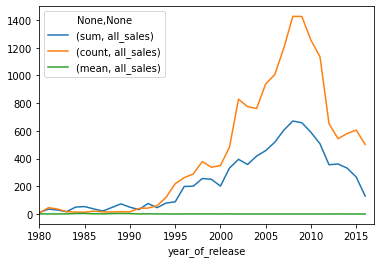

In [61]:
sales_pivot.plot(xlim=(1980,2017));

#### Вывод

Наибольшими продажами на момент 2016 года обладают игры 2008-2010 годов выпуска, количество выпущенных Тайтлов в этих годах так же в топе. Вроде бы и логичная зависимость, но глядя на графики вовсе не прямая. Наклепать игр можно много, финансы у населения не безконечны. Когда то и драться за покупателя придется.

### Количесвто выпущенных игр по Платформам

In [62]:
platform_pivot = df.pivot_table(index = 'platform', values = 'all_sales', aggfunc=['sum', 'count', 'mean']  )
platform_pivot.columns = ('sum', 'count', 'mean')
platform_pivot.sort_values('sum')

,sum,count,mean
platform,,,
PCFX,0.030000,1,0.030000
GG,0.040000,1,0.040000
3DO,0.100000,3,0.033333
TG16,0.160000,2,0.080000
WS,1.420000,6,0.236667
NG,1.440000,12,0.120000
SCD,1.860000,6,0.310000
DC,15.950000,52,0.306731
GEN,28.350000,27,1.050000


In [63]:
top_list =platform_pivot[platform_pivot['sum']>258].index

In [64]:
df_top_platforms = df[df['platform'].isin(top_list)]

In [65]:
df_top_platforms['platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'GBA', 'PS4', 'PS', 'PSP'],
      dtype=object)

In [66]:
df_top_platforms_pivot = df_top_platforms.pivot_table(index = ['platform','year_of_release'], values = 'all_sales', aggfunc=['sum', 'count', 'mean'])

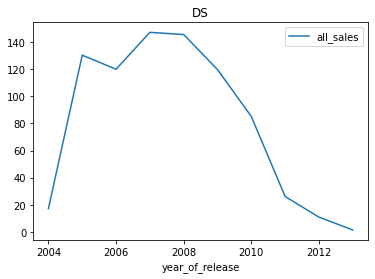

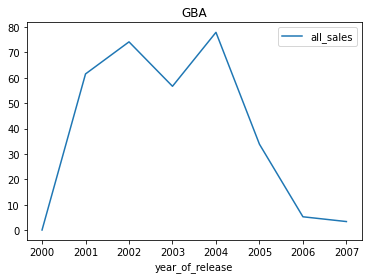

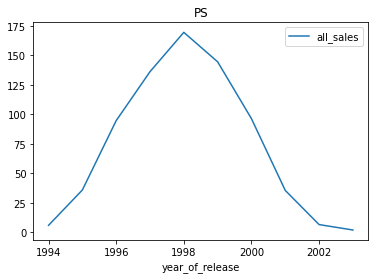

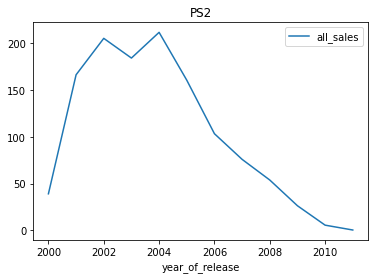

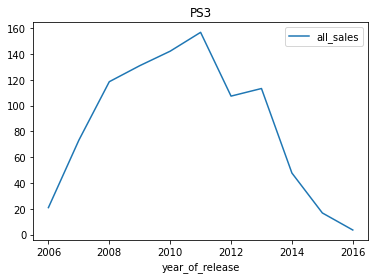

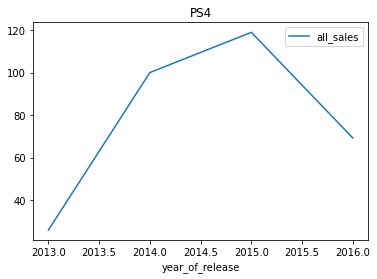

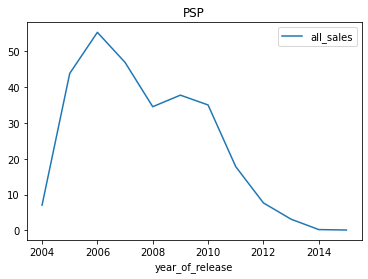

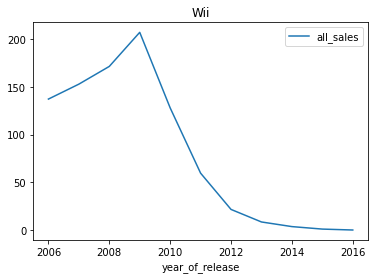

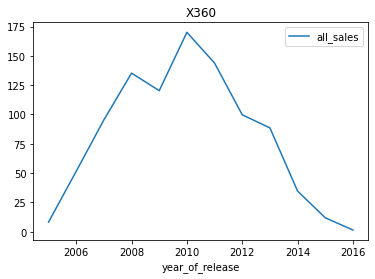

In [67]:
#df_top_platforms_pivot.loc['3DS','sum'].plot()
for index in top_list:
    df_top_platforms_pivot.loc[index,'sum'].plot(title = index )

Судя по графику суммарных продаж время жизни консоли (пк ут в счет не берем, он в этом смысле вечен) от 6 до 8 лет, можно аналогичное посмотреть по количеству выпущенных игр

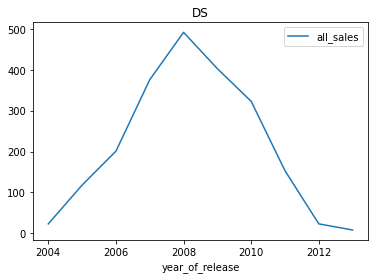

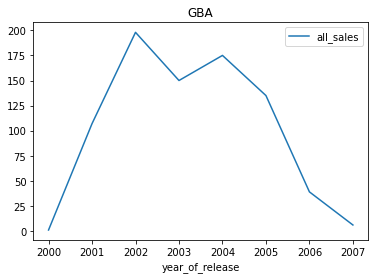

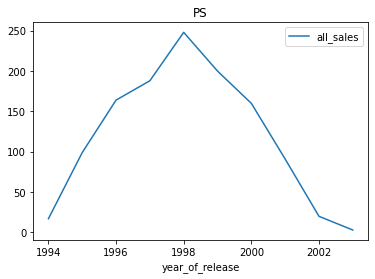

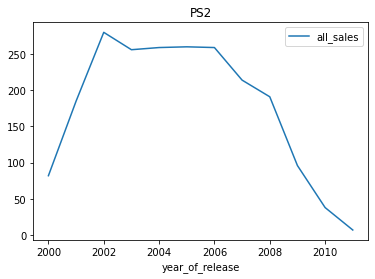

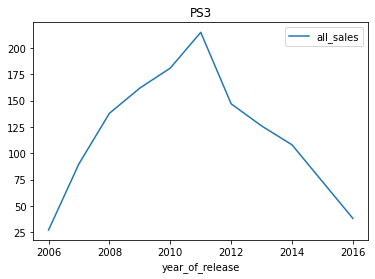

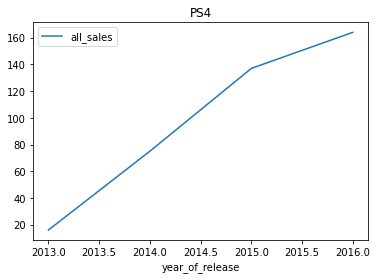

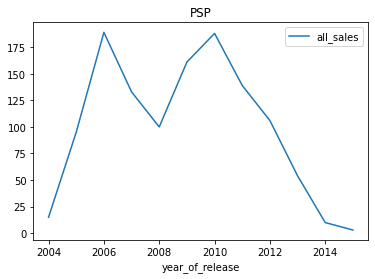

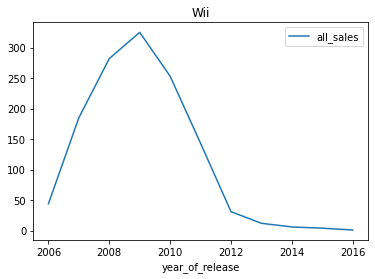

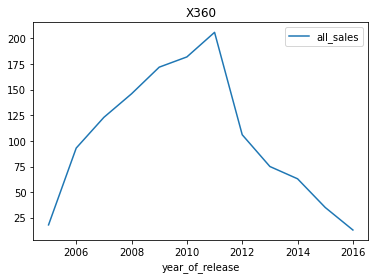

In [68]:
for index in top_list:
    df_top_platforms_pivot.loc[index,'count'].plot(title = index )

аналогичный резульат

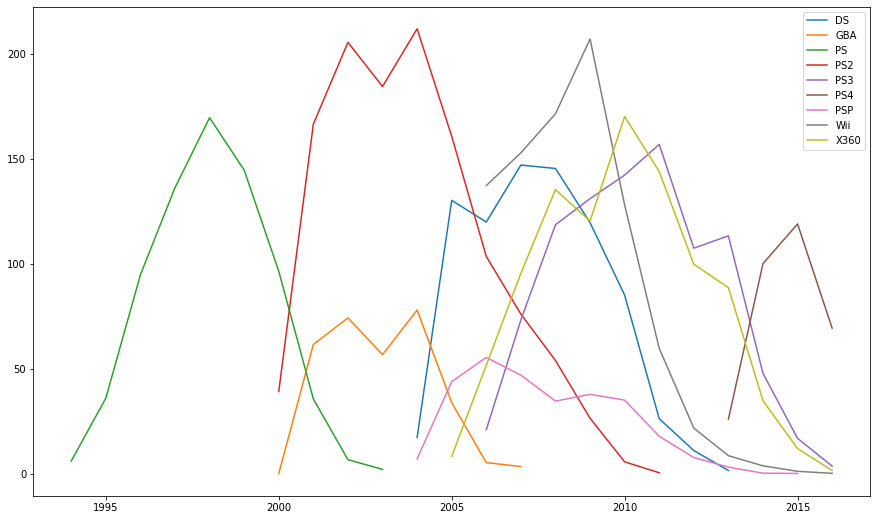

In [69]:
fig, ax = plt.subplots(figsize=(15,9))

for date, new_df in df_top_platforms_pivot.groupby(level = 0):
    ax.plot(new_df.index.get_level_values('year_of_release').values,
            new_df['sum'],
            label = new_df.index.get_level_values('platform').values[0],
            #marker = 'o-',
            linestyle = '-')

ax.legend(frameon = True)

plt.show()

Гуглеж по "pandas plot from pivot table multi index" первой ссылкой приводит на пример по моей же сводной таблице. https://stackoverflow.com/questions/68647288/how-to-create-a-plot-for-a-multiindex-dataframe

я не до конца понимаю как это работает но именно к этому я и хотел прийти своими попытками выше.

#### Вывод

Судя по графикам средний период активной жизни косноли - от 6 до 8 лет. возьмем далее 7 лет (2010-2016). в топ 10 Все стационарные Соньки, ПСП, одна стационарная Нинтенда и куча портативных, ящик 360.

### Анализ актуального периода

In [70]:
df_act = df[df['year_of_release']>=2010]
df_act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5276 entries, 14 to 16572
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             5276 non-null   object 
 1   platform         5276 non-null   object 
 2   year_of_release  5276 non-null   int32  
 3   genre            5276 non-null   object 
 4   na_sales         5276 non-null   float32
 5   eu_sales         5276 non-null   float32
 6   jp_sales         5276 non-null   float32
 7   other_sales      5276 non-null   float32
 8   critic_score     2311 non-null   float64
 9   user_score       2498 non-null   float64
 10  rating           3112 non-null   object 
 11  pegi_rating      1583 non-null   float32
 12  all_sales        5276 non-null   float32
dtypes: float32(6), float64(2), int32(1), object(4)
memory usage: 432.8+ KB


In [71]:
df_act_pivot = df_act.pivot_table(index = ['platform','year_of_release'], values = 'all_sales', aggfunc=['sum', 'count', 'mean'])

In [72]:
df_act_pivot

sum     count      mean
                          all_sales all_sales all_sales
platform year_of_release                               
3DS      2011             63.199997       116  0.544828
         2012             51.360001        93  0.552258
         2013             56.570000        91  0.621648
         2014             43.759998        80  0.547000
         2015             27.780001        86  0.323023
...                             ...       ...       ...
X360     2016              1.520000        13  0.116923
XOne     2013             18.960001        19  0.997895
         2014             54.070000        61  0.886393
         2015             60.139999        80  0.751750
         2016             26.150000        87  0.300575

[65 rows x 3 columns]

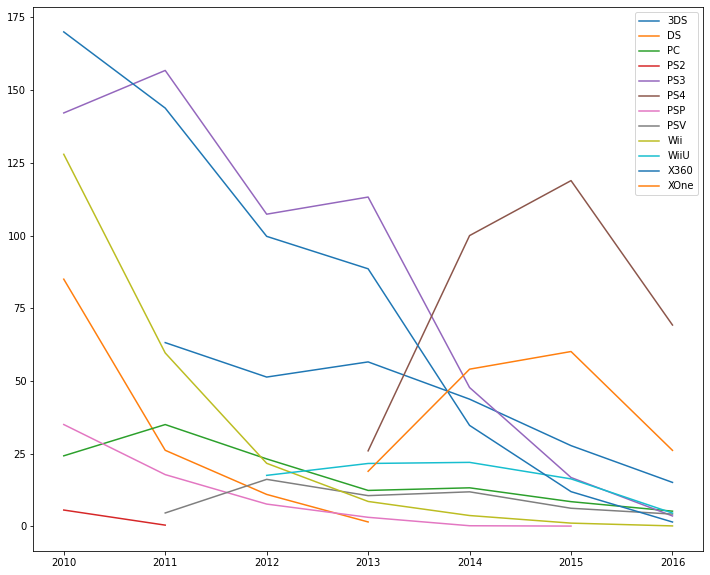

In [73]:

fig, ax = plt.subplots(figsize=(12,10))

for date, new_df in df_act_pivot.groupby(level = 0):
    ax.plot(new_df.index.get_level_values('year_of_release').values,
            new_df['sum'],
            label = new_df.index.get_level_values('platform').values[0],
            #marker = 'o-',
            linestyle = '-')

ax.legend(frameon = True)

plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
А вот тут прям все идеально. 
</div>

итак, 2016 год не полный, так что смотрим до 2015го. рост только у XBOX ONE и PS4, Спад, но все же значимые продажи у wiiU, ps3, xbox360 и nintendi 3ds (правда последние 2 я на графике по цвету различить не могу:), но по 3ds данные только с 11 года)

Важное Но - в таблице указаны продажи игры с момента ее выхода до текущего времени. то есть если игра вышла в конце 2012, а все продаже собрала в 2013, то данные попадут в 2012.

<AxesSubplot:>

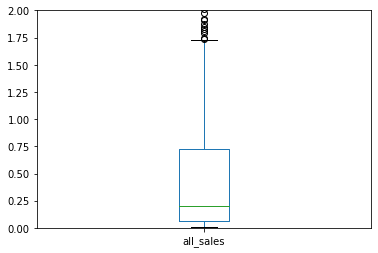

In [74]:
df_act[df_act['platform']=='PS4']['all_sales'].plot(kind = 'box', ylim=(0,2))

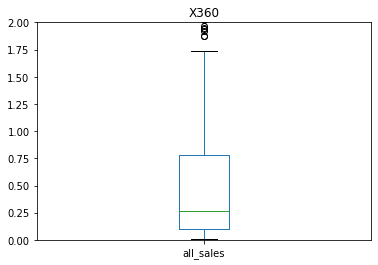

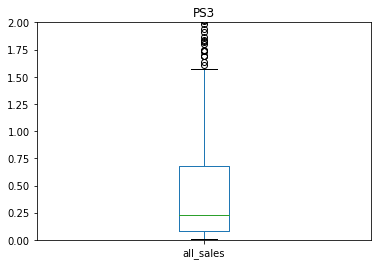

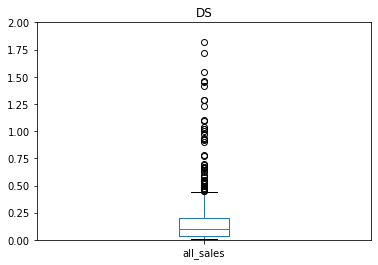

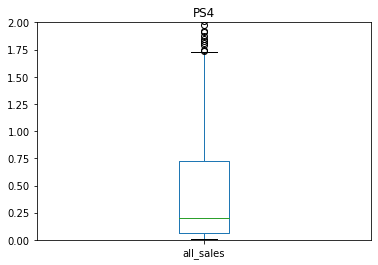

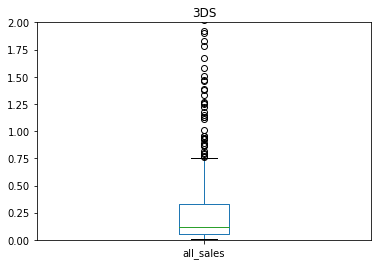

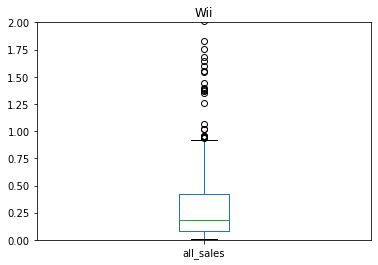

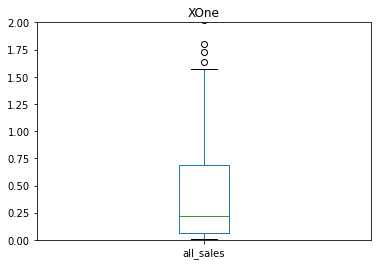

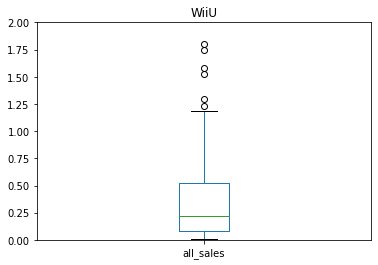

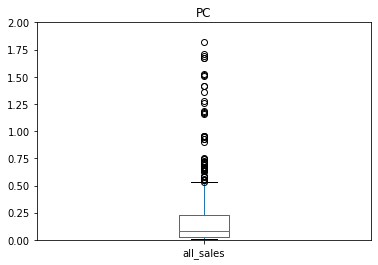

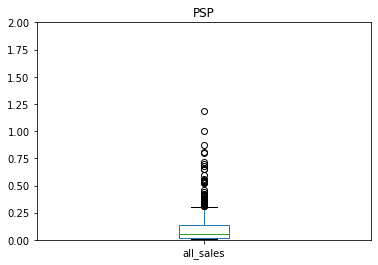

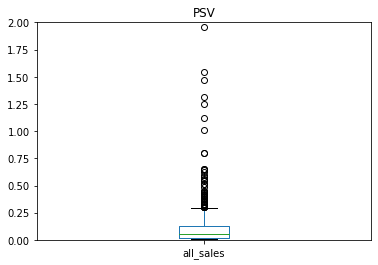

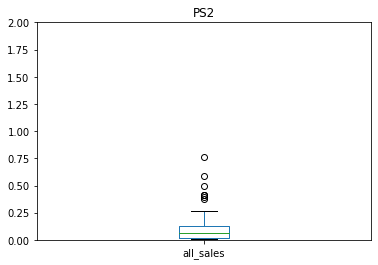

In [75]:
for plat in df_act['platform'].unique():
    df_act[df_act['platform']==plat]['all_sales'].plot(kind = 'box', ylim=(0,2), title = plat)
    plt.show()

да, график с усами по каждой платформе. но не наглядно

(0.0, 3.0)

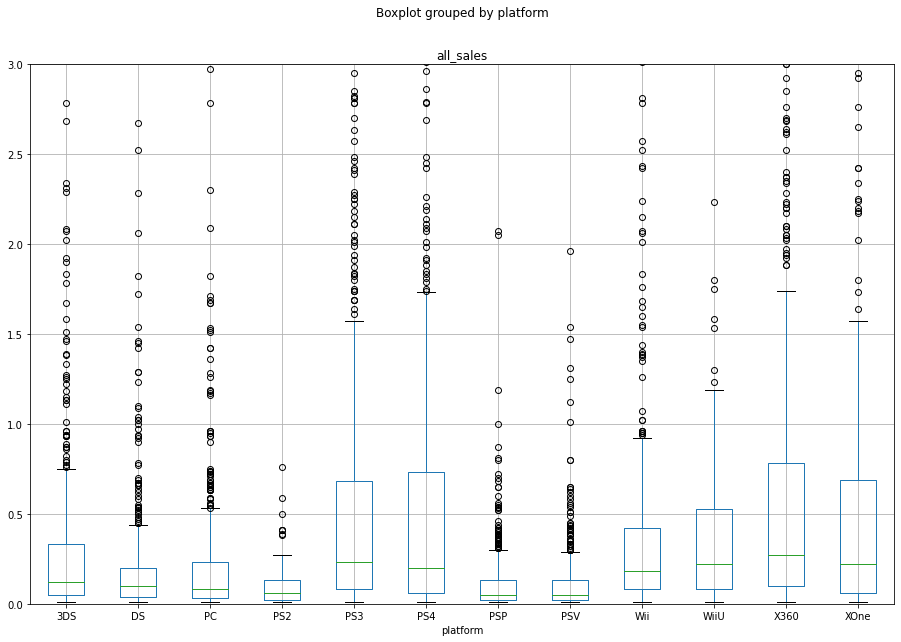

In [87]:
df_act.boxplot(column='all_sales', by = 'platform', figsize=(15,10))
plt.ylim([0, 3])


это называется "читаем инструкцию, а не stackoverflow". как изменить диапазон шкалы y я не нашел.

#### вывод по "ящику"

Выбросы Есть. Вот только  сбрасывать их со счетов нельзя. это игры-Хиты.


### зависимость продаж от оценок пользователей и критиков

выберем платформу X360

In [80]:
platf = 'X360'

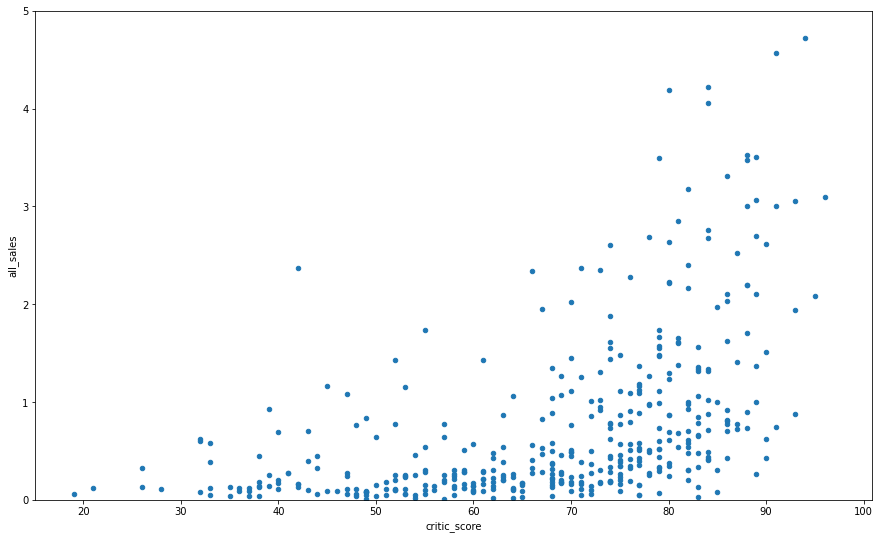

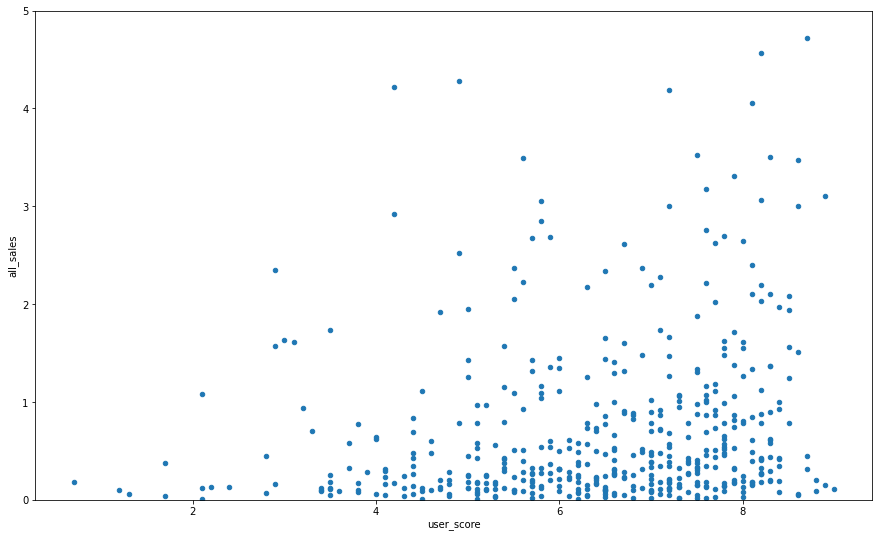

In [81]:
df_act[df_act['platform']==platf].plot(x='critic_score', y='all_sales', kind='scatter', figsize=(15,9), ylim=(0,5))
df_act[df_act['platform']==platf].plot(x='user_score', y='all_sales', kind='scatter', figsize=(15,9), ylim=(0,5));

посмотрим по другим платформам

In [82]:
platf = 'PS3'

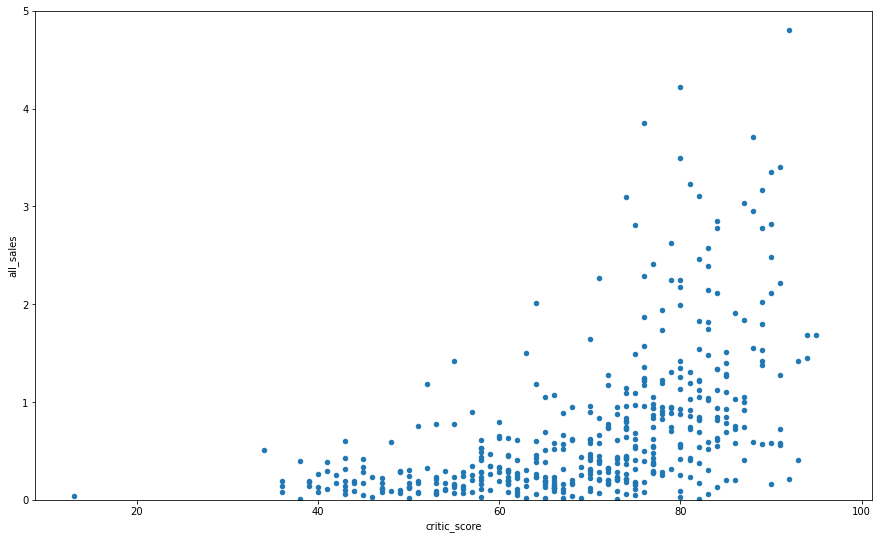

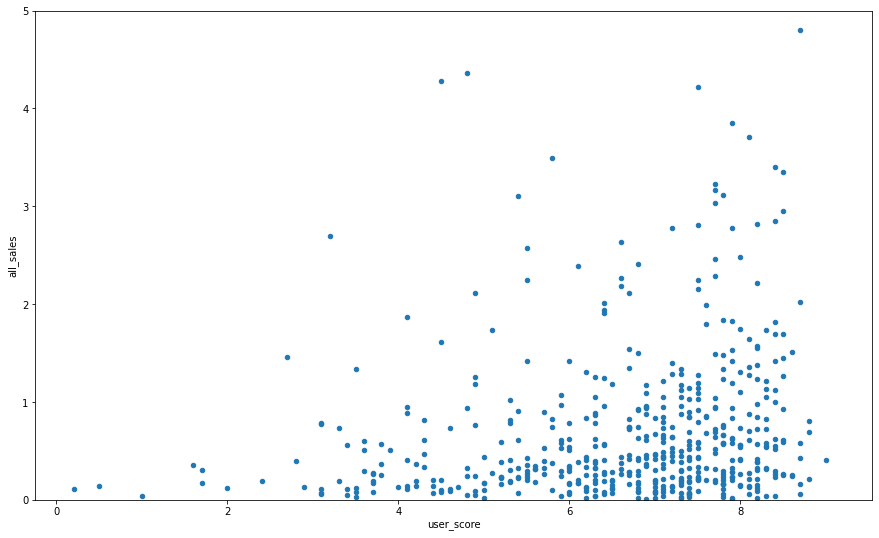

In [83]:
df_act[df_act['platform']==platf].plot(x='critic_score', y='all_sales', kind='scatter', figsize=(15,9), ylim=(0,5))
df_act[df_act['platform']==platf].plot(x='user_score', y='all_sales', kind='scatter', figsize=(15,9), ylim=(0,5));

In [84]:
platf = 'PS4'

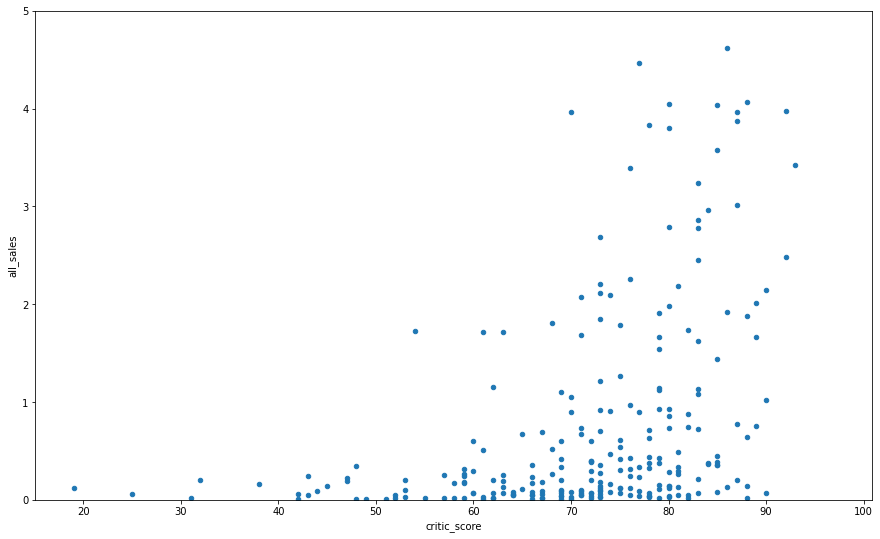

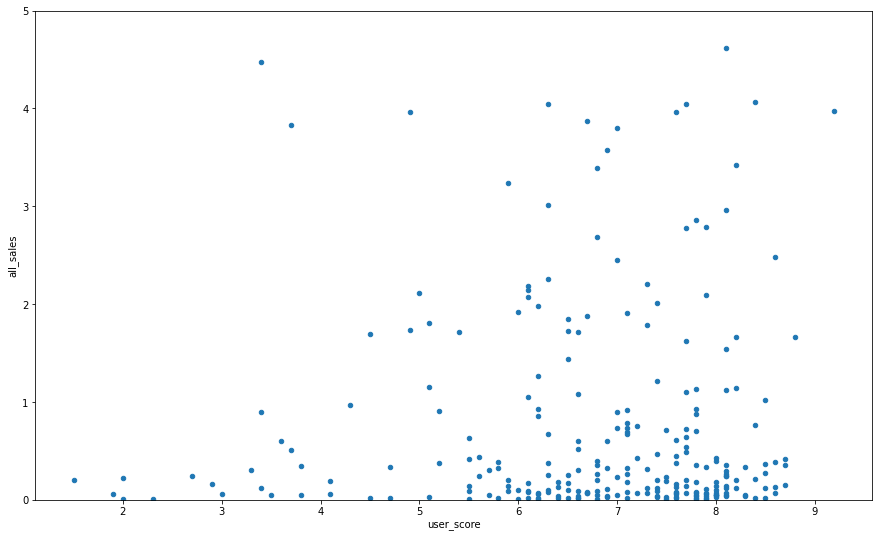

In [85]:
df_act[df_act['platform']==platf].plot(x='critic_score', y='all_sales', kind='scatter', figsize=(15,9), ylim=(0,5))
df_act[df_act['platform']==platf].plot(x='user_score', y='all_sales', kind='scatter', figsize=(15,9), ylim=(0,5));

In [86]:
platf = 'XOne'

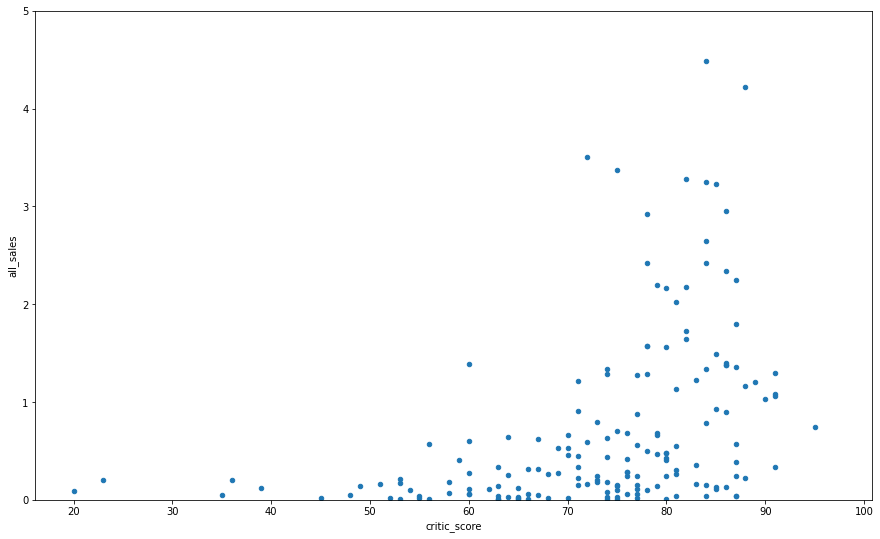

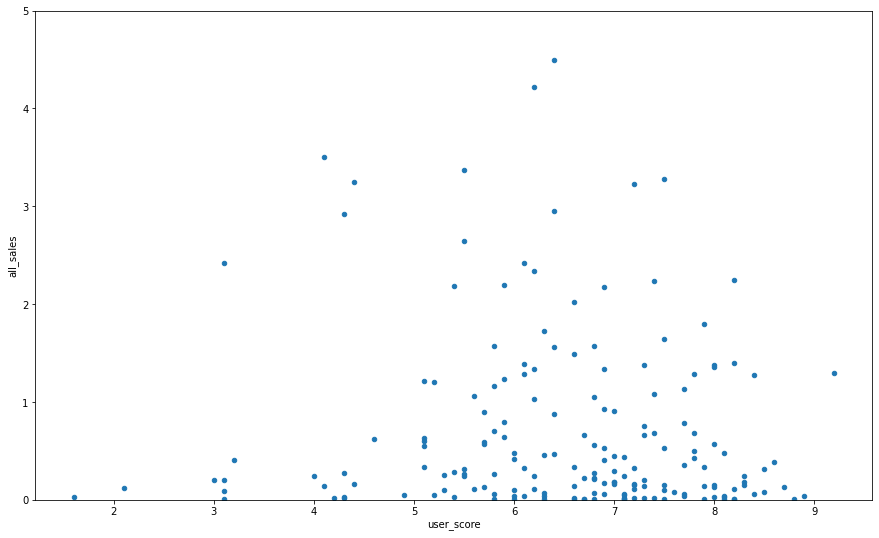

In [87]:
df_act[df_act['platform']==platf].plot(x='critic_score', y='all_sales', kind='scatter', figsize=(15,9), ylim=(0,5))
df_act[df_act['platform']==platf].plot(x='user_score', y='all_sales', kind='scatter', figsize=(15,9), ylim=(0,5));

#### вывод

диаграммы рассеяния выглядят похоже (самые выдающиеся продажи я отрезал). по Xbox360 и ps3 больше данных, график выглядит более плотным. (что логично, это более старые консоли), корреляция положительная для всеъ графиков

### Зависимость продаж от жанров

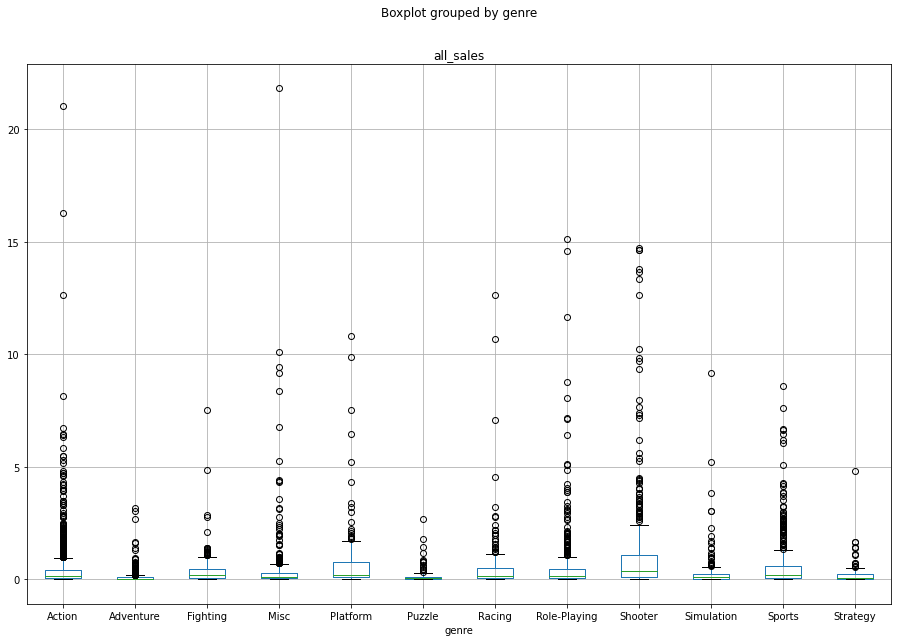

In [88]:
df_act.boxplot(column='all_sales', by = 'genre', figsize=(15,10));

#### Вывод

Если говорить о средненькой игре, то наиболее результативные жанры это Шутеры, Платформеры и спорт. но если речь идет о потенциальном Хите, выбивающемся из статистики, то в платформеры лезть не стоит, лучше Ролевые рассмотреть. Пазлы и приключения в провале

## Анализ по региаонам продаж

### Платформы

In [89]:
df_act.groupby('platform')['na_sales'].sum().sort_values()

platform
PS2       2.320000
PSP       9.650000
PSV      12.470000
WiiU     38.099998
PC       39.070000
DS       59.660000
3DS      82.650002
XOne     93.120003
PS4     108.739998
Wii     121.199997
PS3     229.250000
X360    334.179993
Name: na_sales, dtype: float32

In [90]:
df_act.groupby('platform')['eu_sales'].sum().sort_values()

platform
PS2       1.670000
PSP       7.590000
PSV      13.070000
WiiU     25.129999
DS       28.059999
XOne     51.590000
3DS      61.270000
Wii      65.909996
PC       68.820000
PS4     141.089996
X360    163.410004
PS3     213.600006
Name: eu_sales, dtype: float32

In [91]:
df_act.groupby('platform')['jp_sales'].sum().sort_values()

platform
PC        0.000000
XOne      0.340000
PS2       0.800000
X360      5.460000
WiiU     13.010000
PS4      15.960000
Wii      17.750000
PSV      21.840000
DS       27.900000
PSP      42.200001
PS3      59.259998
3DS     100.620003
Name: jp_sales, dtype: float32

#### вывод

Америка - в топе только стационарныы консоли. в Европе в топ 5 попал обычный PC и вообще не попали консоли нового поколения (ps4 и xone), предположил, что это может быть вызвано более поздним запуском в европе, но нет. релиз и соньки и ящика на обоих континетах в один день.

Япония - отдельный мир. из стационарных в топе только PS3, все остальное - портативные консоли.

### Жанры

In [92]:
df_act.groupby('genre')['na_sales'].sum().sort_values()

genre
Puzzle            9.100000
Strategy         13.250000
Adventure        20.840000
Simulation       26.389999
Fighting         39.049999
Racing           46.110001
Platform         54.900002
Role-Playing    112.050003
Misc            123.800003
Sports          156.809998
Shooter         237.470001
Action          290.640015
Name: na_sales, dtype: float32

In [93]:
df_act.groupby('genre')['eu_sales'].sum().sort_values()

genre
Puzzle            6.580000
Strategy         12.490000
Adventure        18.879999
Fighting         20.330000
Simulation       26.389999
Platform         38.299999
Racing           54.750000
Misc             66.089996
Role-Playing     75.480003
Sports          116.839996
Shooter         171.449997
Action          233.630005
Name: eu_sales, dtype: float32

In [94]:
df_act.groupby('genre')['jp_sales'].sum().sort_values()

genre
Puzzle            3.400000
Racing            6.680000
Strategy          6.800000
Simulation       13.300000
Fighting         13.900000
Shooter          14.040000
Sports           15.510000
Adventure        15.670000
Platform         15.810000
Misc             24.290001
Action           72.199997
Role-Playing    103.540001
Name: jp_sales, dtype: float32

#### вывод

Америка и Европа - почти под копирку.

Япония - в топе Ролевухи, да и вообще все то, что в европе и америке не популярно.

### Влияние рейтинга ESRB 

рассмотрим гистограммами рассеяния

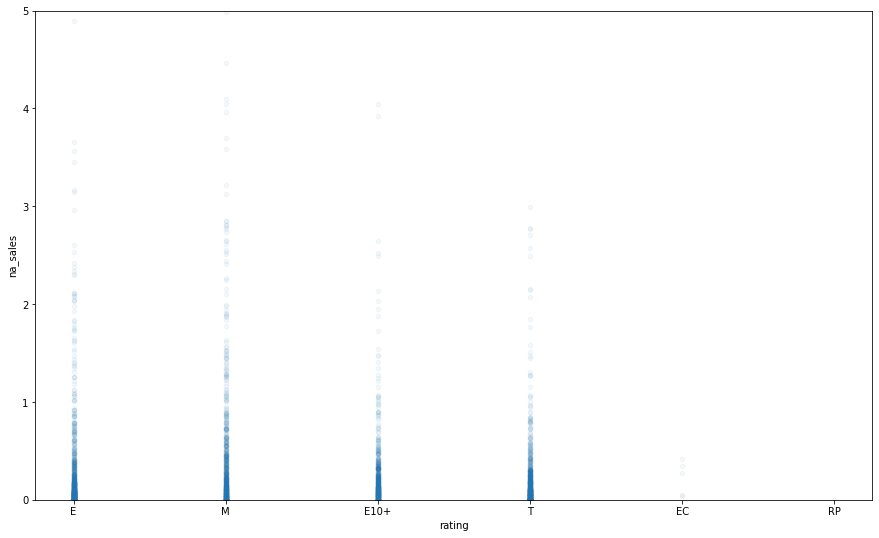

In [95]:
df_act[~df_act['rating'].isna()].plot(x='rating', y='na_sales', kind='scatter', figsize=(15,9), ylim=(0,5), alpha =0.05);

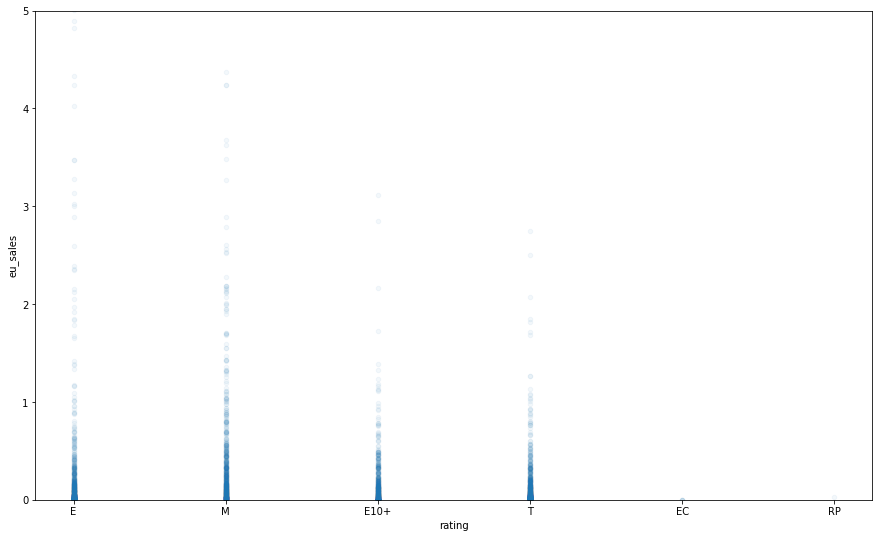

In [96]:
df_act[~df_act['rating'].isna()].plot(x='rating', y='eu_sales', kind='scatter', figsize=(15,9), ylim=(0,5), alpha =0.05);

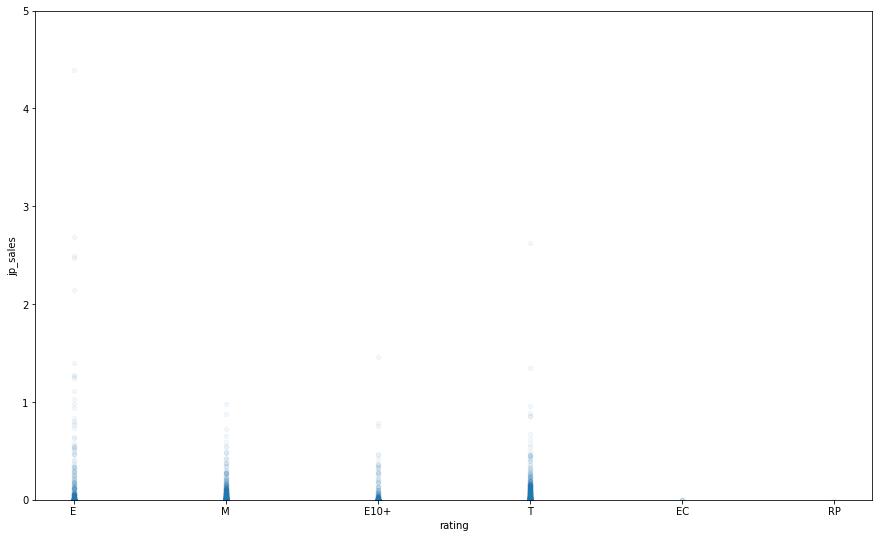

In [97]:
df_act[~df_act['rating'].isna()].plot(x='rating', y='jp_sales', kind='scatter', figsize=(15,9), ylim=(0,5), alpha =0.05);

#### Вывод

В Японии и Европе M и T рейтинги неного преобладают в плотности. в абсолютныъ значениях в пики выбивается E, что вполне логично - игры для всех, нет ограничений по продаже и рекламе. Кстати нет рейтинга А (игры с которым вроде как к рекламе даже запрещены)

### Pegi

Ну и раз уж я потратил тучу времени на вклинивание сюда датесета с Пэги рейтингом, то рассмотрим и его

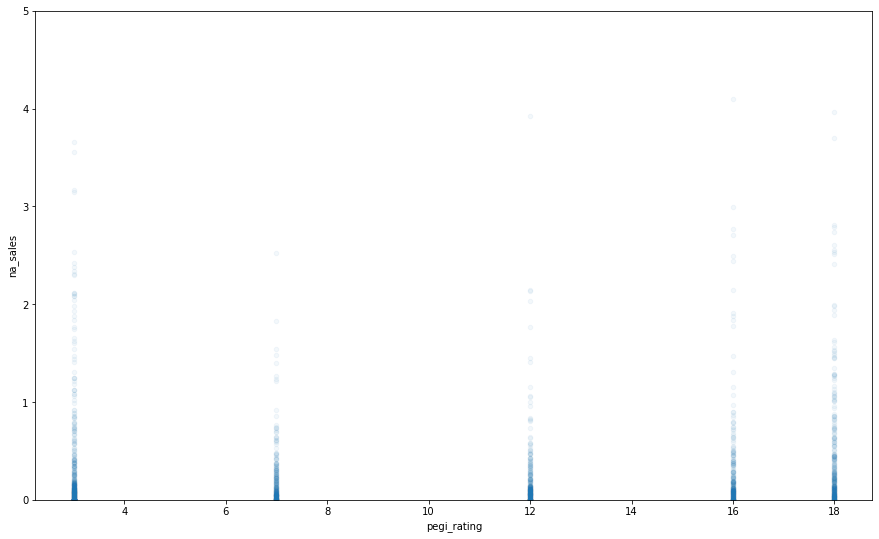

In [98]:
df_act[~df_act['pegi_rating'].isna()].plot(x='pegi_rating', y='na_sales', kind='scatter', figsize=(15,9), ylim=(0,5), alpha =0.05);

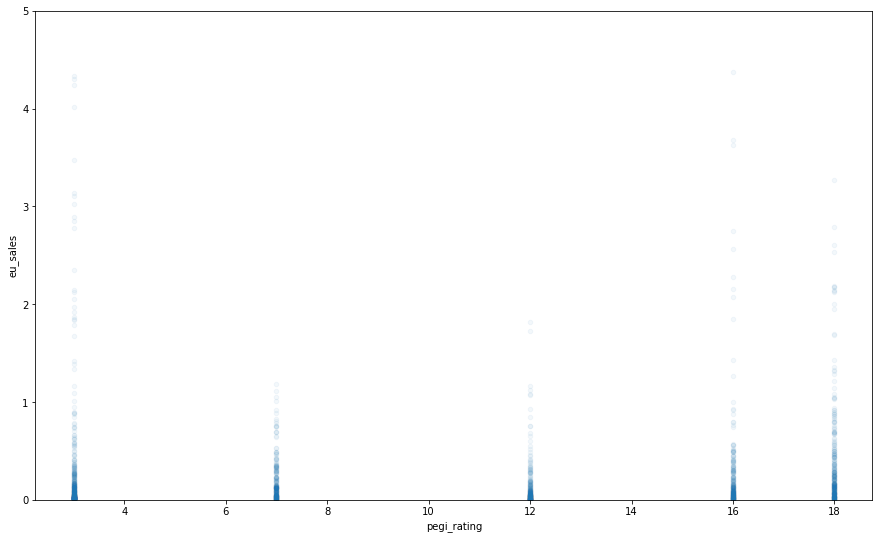

In [99]:
df_act[~df_act['pegi_rating'].isna()].plot(x='pegi_rating', y='eu_sales', kind='scatter', figsize=(15,9), ylim=(0,5), alpha =0.05);

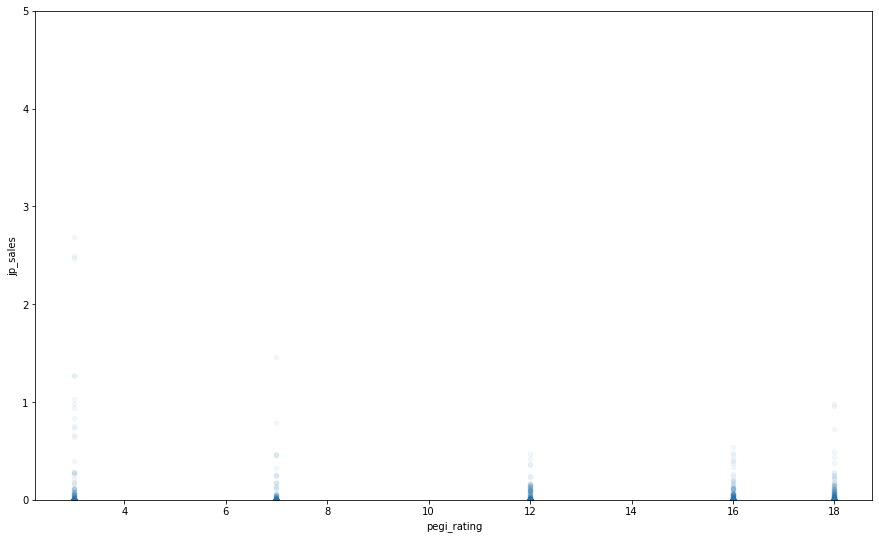

In [100]:
df_act[~df_act['pegi_rating'].isna()].plot(x='pegi_rating', y='jp_sales', kind='scatter', figsize=(15,9), ylim=(0,5), alpha =0.05);

#### вывод

0+ преобладает, а следом 16+ и 18+

## проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H0: Средние Рейтинги равны

H1: Средние Рейтинги НЕ равны

alpha = 0.05 - примем так

In [101]:
results = st.ttest_ind(
    df_act[(df_act['platform']=='PC')&(~df_act['user_score'].isna())]['user_score'], 
    df_act[(df_act['platform']=='XOne')&(~df_act['user_score'].isna())]['user_score'])
results.pvalue

0.980998110649032

#### вывод

Гипотезе НЕ отвергнута

### Средние пользовательские рейтинги жанров Action и Sports разные

H0: Средние Рейтинги равны

H1: Средние Рейтинги НЕ равны

alpha = 0.05 - примем так

In [102]:
results = st.ttest_ind(
    df_act[(df_act['genre']=='Action')&(~df_act['user_score'].isna())]['user_score'], 
    df_act[(df_act['genre']=='Sports')&(~df_act['user_score'].isna())]['user_score'])
results.pvalue

9.881792320848471e-19

#### вывод

Гипотезе отвергнута. проверяась гипотеза равенства, так как так работает метод. проверяет равенство.

## Общий Вывод

Ознакомившись с датасетом можно дать следующие рекомендации:

В Америке лучшим спросом пользуются игры стационарных консолей. в Европе не стоит забывать про ПК. в Японии преобладают портативные консоли. Так же учитывать популярность Жанров, рассмотренную в пункте 4.2. Япония все-таки специфичный рынок. в качестве рейтинга все же видится более удачным подростковый и взрослый (M и T), так как кого это останавливало (в 7 лет играть в Мортал комбат с рейтингом М - норма:), а так же тот, кто для нее сейчас "мал", через пару годков может дорасти до нее и стать покупателем.